This example is from the book 
https://d2l.ai/chapter_recurrent-neural-networks/sequence.html#a-toy-example
Objective is understand problem setting of recurrent neural network.

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils.data
display.set_matplotlib_formats('svg')   #displays matplotlib inline plots as 'svg' formats

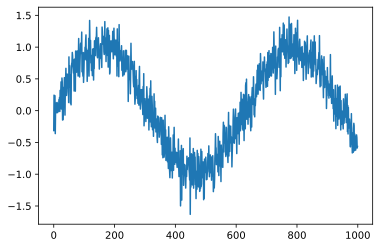

In [4]:
embedding = 4   # Embedding dimension for autoregressive model
T = 1000        # Generate a total of 1000 points
time = torch.arange(0.0,T)
x = torch.sin(0.01 * time) + 0.2*torch.randn(T)
plt.plot(time.numpy(), x.numpy())

In [5]:
features = torch.zeros((T-embedding, embedding))
for i in range(embedding):
    features[:,i] = x[i:T-embedding+i]
labels = x[embedding:]

ntrain = 600
train_data = torch.utils.data.TensorDataset(features[:ntrain,:], labels[:ntrain])
test_data = torch.utils.data.TensorDataset(features[ntrain:,:], labels[ntrain:])

In [12]:
# Function for initializing the weights of net
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)

# Vanilla MLP architecture
def get_net():
    net = nn.Sequential()
    net.add_module('Linear_1', nn.Linear(4, 10, bias = False))
    net.add_module('relu1', nn.ReLU())
    net.add_module('Linear_2', nn.Linear(10, 10, bias = False))
    net.add_module('relu2', nn.ReLU())
    net.add_module('final', nn.Linear(10, 1, bias = False))
    net.apply(init_weights)
    return net

loss = nn.MSELoss()     #L2 loss is known as MSELoss in Pytorch

In [13]:
# Simple optimizer using Adam, random shuffle, minibatch size 16
def train_net(net, data, loss, epochs, learningrate):
    batch_size = 16
    trainer = torch.optim.Adam(net.parameters(), lr= learningrate)
    data_iter = torch.utils.data.DataLoader(data, batch_size = batch_size, shuffle=True)
    for epoch in range(1, epochs + 1):
        running_loss = 0.0
        for X, y in data_iter:
            trainer.zero_grad()
            output = net(X)
            los = loss(output,y.reshape(-1,1))
            los.backward()
            trainer.step()
            running_loss += los.item()
        
        print('epoch %d, loss: %f' % (epoch, running_loss))
    return net

net = get_net()
net = train_net(net, train_data, loss, 10, 0.01)

l = loss(net(test_data[:][0]), test_data[:][1].reshape(-1,1))
print('test loss: %f' % l.mean().detach().numpy())

epoch 1, loss: 7.633079
epoch 2, loss: 2.318459
epoch 3, loss: 2.208996
epoch 4, loss: 2.260839
epoch 5, loss: 2.155482
epoch 6, loss: 2.125182
epoch 7, loss: 2.155721
epoch 8, loss: 2.401112
epoch 9, loss: 2.309755
epoch 10, loss: 2.177757
test loss: 0.053149


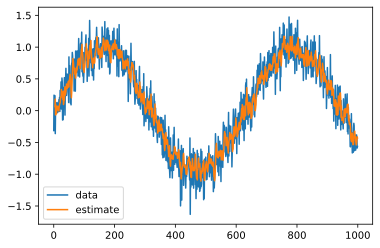

In [14]:
estimates = net(features)
plt.plot(time.numpy(), x.numpy(), label='data');
plt.plot(time[embedding:].numpy(), estimates.detach().numpy(), label='estimate');
plt.legend();